# Hypothesis 3: There is a positive correlation between the distance of the survey and the total amount of litter found

## Hypothesis
- **Alternative Hypothesis (H₁):** There is a positive correlation between the distance of the survey and the total amount of litter found.
- **Null Hypothesis (H₀):** There is no correlation between the distance of the survey and the total amount of litter found.

## Rationale
The amount of litter collected during a survey might be influenced by how far the survey covers. This is because a longer survey distance could mean that a larger area of the ocean is being sampled, potentially leading to the collection of more litter.

## Data Analysis & Validation Approach

To explore this hypothesis, we will first conduct an Exploratory Data Analysis (EDA). 

This will involve:

- Scatterplot: Distance vs. Total Litter. This will allow an assessment of the direction and strength of any potential relationship between these two variables.

Following the EDA, we will use two statistical methods to validate our findings:

- Pearson Correlation Coefficient: Will quantify a linear relationship between the variables, or lack thereof.
- T-test to determine statistical significance of an observed correlation. This will suggest whether or not the relationship between distance trawled and litter count is due to chance or a real observation. 

# Change working directory

To facilitate proper file access, the working directory is to be adjusted to its parent directory
* os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis/jupyter_notebooks'

To set the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis'

Confirm the new current directory

## Loading CSV's & Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/02_PROCESSED_NEA-Seafloor-Litter.csv')
df_alltime = pd.read_csv('data/03_ALL_TIME_litter_totals.csv')
df_yearly = pd.read_csv('data/04_YEARLY_litter_totals.csv')
df_monthly = pd.read_csv('data/05_MONTHLY_litter_totals.csv')


### Visual Exploration & Trend Visualisation : Scatter Plot with Trend Line

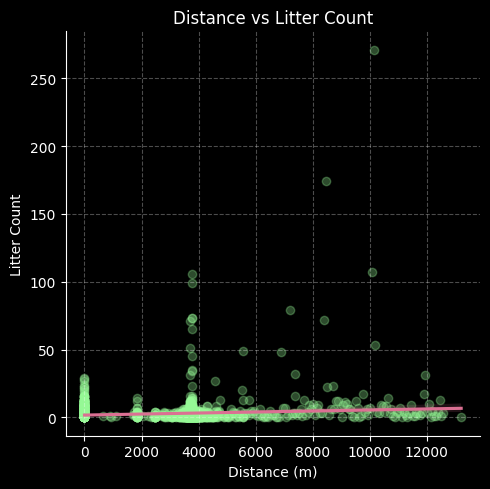

In [5]:
plt.style.use('dark_background')

sns.lmplot(
    data=df,
    x='distance',
    y='totallitter',
    scatter_kws={'color': 'palegreen', 'alpha':0.3},  # Scatter plot color
    line_kws={'color': 'palevioletred'},  # Trendline color
    legend=False #removes legend
)

plt.title('Distance vs Litter Count')
plt.xlabel('Distance (m)')
plt.ylabel('Litter Count')

plt.grid(True, linestyle='--', alpha=0.3)  # Gridlines
plt.tight_layout()  # Adjusts plot to fit labels
plt.show()

**Analysis:** the data points are widely dispersed, and the trendline is nearly horizontal, indicating a lack of a clear linear relationship between survey distance and litter count. 

This suggests that the distance covered during a survey does not significantly influence the amount of litter collected. Furthermore, the majority of surveys recorded low litter counts, with only a few instances of high counts observed. 

This visual analysis indicates that other factors, not distance, likely play a more significant role in litter accumulation

### Statistical Validation & Trend Confirmation: Pearson correlation & T-test

To investigate whether there was a linear relationship between the distance of the haul and the total amount of litter found, the Pearson correlation coefficient and t-test were used.

These methods were selected because we wanted to quantify the strength and direction of the linear relationship between two continuous variables (distance and litter count). However, visual inspection of the scatter plot suggested a lack of correlation. The Pearson correlation coefficient and t-test were used to confirm this observation statistically, as they provide a measure of the linear relationship and assess its statistical significance, respectively.

In [9]:
import numpy as np
from scipy import stats

# Pearsons correlation 
print(df[['distance', 'totallitter']].corr())

# Correlation coefficient
cor_coef = df[['distance', 'totallitter']].corr().iloc[0,1]

print("\n")

# T-test
t_stat = cor_coef * np.sqrt((len(df) - 2) / (1 - cor_coef**2))
p_val = stats.t.sf(np.abs(t_stat), len(df) - 2) * 2

print(f'Correlation coefficient: {cor_coef}')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')





             distance  totallitter
distance      1.00000      0.11963
totallitter   0.11963      1.00000


Correlation coefficient: 0.11963034904850894
T-statistic: 7.90602321776616
P-value: 3.3508679441745043e-15


analysis: The correlation matrix shows a very weak correlation between these two variables (r= 0.11963). This finding is consistent with the scatterplot that sported a near horizontal trendline.

However, a t-test indicated that this correlation was statistically significant (t = 7.91, p < 0.001). This suggests that while the linear relationship between distance and litter count is weak, it is unlikely to be due to random chance.

## Conclusion

Based on the results from the Pearson correlation and t-test, we fail to reject the null hypothesis (H₀) and do not accept the alternative hypothesis (H₁). The data shows no statistically significant linear relationship between the distance of bottom trawl surveys and the total litter count (r = 0.1196, p > 0.05).